In [6]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import fftpack
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

In [7]:
def set_ticks(ax, xMaj, xMin, yMaj, yMin):
    ax.xaxis.set_major_locator(MultipleLocator(xMaj))
    ax.xaxis.set_minor_locator(AutoMinorLocator(xMin))
    ax.yaxis.set_major_locator(MultipleLocator(yMaj))
    ax.yaxis.set_minor_locator(AutoMinorLocator(yMin))
    ax.tick_params(which='major', width=1.0, length=10, direction="in", labelsize=12)
    ax.tick_params(which='minor', width=1.0, length=5, direction="in", labelsize=12)

In [73]:
def hist_fill(ax, x, y, bins, pi, pf, color, label):
    
    # step histogram
    hist, edges, _ = ax.hist(x=x, weights=y, bins=bins, histtype="step", edgecolor=color, linewidth=2, label=label)
    
    # generate xy points
    hist = np.hstack((0, np.repeat(hist, 2), 0))
    edges = np.repeat(edges, 2)
    
    # define fill region
    hatch_from = pi
    hatch_till = pf
    fill_region = (hatch_from < edges) & (edges < hatch_till) 
    
    # fill histogram
    ax.fill_between(edges[fill_region], hist[fill_region], color=color, alpha=0.25)

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [49]:
val = 15
avg = 6.3

'''
    Assume as statistically significant
    a Z-score of at least 3 with respect
    to a normal distribution.
    Fixing z = 3, we can find the 
    related p-value.
'''

z    = 3
pval = 1 - sp.stats.norm.cdf(z)
print("A Z-score of at least 3 refers to a p-value of %.5f" % pval)


# Z-score
z_ = np.abs(val - avg) / np.sqrt(avg)

print("The Z-score is %.5f and the observed value is statistically significant" % z_)

'''
    Compute the probability of having at least
    15 hurricanes. Finally find the Z-score and
    the p-value.
'''

# probability
prob = 1 - np.sum([sp.stats.poisson.pmf(i, avg) for i in range(val)])
print("The probability that at least 15 hurricanes occur in a year is %.5f" % prob)
print("Finally, we found that the probability is in fact greater than the set significance: P = %.5f > pv = %.5f" % (prob, pval))

A Z-score of at least 3 refers to a p-value of 0.00135
The Z-score is 3.46616 and the observed value is statistically significant
The probability that at least 15 hurricanes occur in a year is 0.00222
Finally, we found that the probability is in fact greater than the set significance: P = 0.00222 > pv = 0.00135


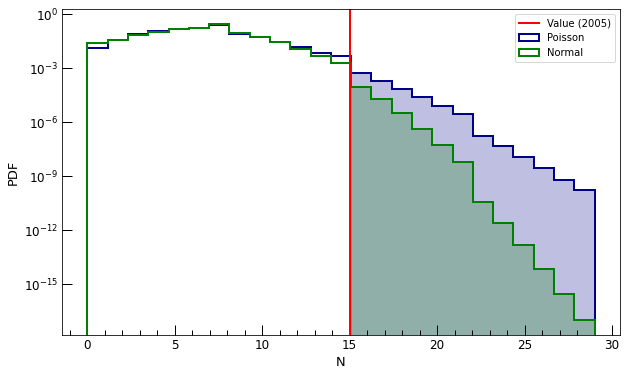

In [87]:
'''
    Representation of the analysis.
'''

# plot layout
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_yscale('log') 
ax.tick_params(axis='both', which='major', direction='in', width=1, length=10, labelsize=12)
ax.tick_params(axis='both', which='minor', direction='in', width=1, length=5)
ax.minorticks_on()

# data
x  = np.arange(0, 30, 1)
y_pois = sp.stats.poisson.pmf(k=x, mu=avg)
y_norm = sp.stats.norm.pdf(x, loc=avg, scale=sigma)

# plot
hist_fill(ax, x, y_pois, 25, 15, 30, "darkblue", "Poisson")
hist_fill(ax, x, y_norm, 25, 15, 30, "green", "Normal")
ax.axvline(val, color="red", lw=2, label="Value (2005)")

# labels
ax.set_xlabel("N", fontsize=13)
ax.set_ylabel("PDF", fontsize=13)
ax.legend(loc='best', markerscale=1)

plt.show()

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = 3.7870


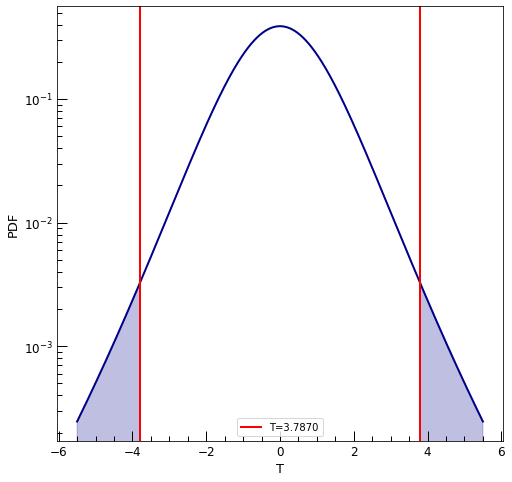

The p-value is 0.0043
The null hypotesis is that the change is not significant.
The p-value is less than the 0.0500 threshold, hence we reject the null hypotesis.
The change in blood pressure is statistically significant.


In [108]:
pre  = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

# compute mean and stdev
mean_pre = np.mean(pre)
mean_post = np.mean(post)
s_pre = np.std(pre, ddof=1)
s_post = np.std(post, ddof=1)

# compute sigma and test
n = len(pre)
dof = n - 1

sigma = np.sqrt((s_pre**2 + s_post**2) / 2)
T = np.abs(mean_pre - mean_post) / (sigma * np.sqrt(2/n)) 
print("T = %.4f" % T)

'''
    Plot the PDF.
'''

# plot layout
fig, ax = plt.subplots(figsize=(8,8))
ax.set_yscale('log') 
ax.tick_params(axis='both', which='major', direction='in', width=1, length=10, labelsize=12)
ax.tick_params(axis='both', which='minor', direction='in', width=1, length=5)
ax.minorticks_on()


# plot
x = np.linspace(-5.5, 5.5, 1000)
ax.plot(x, stats.t.pdf(x, dof), color="darkblue", lw=2)
ax.fill_between(x, stats.t.pdf(x, n-1), where=(np.abs(x)>np.abs(T)), color='darkblue', alpha=0.25)

ax.axvline(T, lw=2, color='red', label="T={0:.4f}".format(T))
ax.axvline(-T, lw=2, color='red')

# labels
ax.set_ylabel("PDF", fontsize=13)
ax.set_xlabel("T", fontsize=13)
ax.legend()

plt.show()

'''
    Test.
'''

# p-value of double tailed Student pdf
pval = sp.stats.t.cdf(-T, loc=0, scale=1, df=dof)  + sp.stats.t.sf(T, loc=0, scale=1, df=dof) 
print("The p-value is %.4f" % pval)

# decide wheter to reject the null hypothesis or not
alpha = 0.05
print("The null hypotesis is that the change is not significant.")
if(pval < alpha):
    print("The p-value is less than the %.4f threshold, hence we reject the null hypotesis." % alpha)
    print("The change in blood pressure is statistically significant.")
else:
    print("We accept the null hypotesis: the change is *not* statistically significant.")

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

In [2]:
# load data
!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

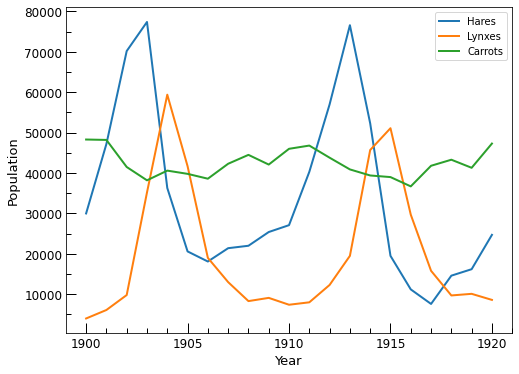

In [12]:
# get data 
data = np.loadtxt("data/populations.txt")
year, hares, lynxes, carrots = data.T

# plot layout
fig, ax = plt.subplots(figsize=(8, 6))
set_ticks(ax, 5, 5, 10000, 2)

# plot data
ax.plot(year, hares, lw=2, label="Hares")
ax.plot(year, lynxes, lw=2, label="Lynxes")
ax.plot(year, carrots, lw=2, label="Carrots") 

# labels
ax.set_xlabel("Year", fontsize=13)
ax.set_ylabel("Population", fontsize=13)
ax.legend(loc="best", markerscale=1)

plt.show()

Hares peak frequency is 0.0952 (years)^-1, hence the period is 10.5000 years.
Lynxes peak frequency is 0.0952 (years)^-1, hence the period is 10.5000 years.
Carrots peak frequency is 0.0952 (years)^-1, hence the period is 10.5000 years.


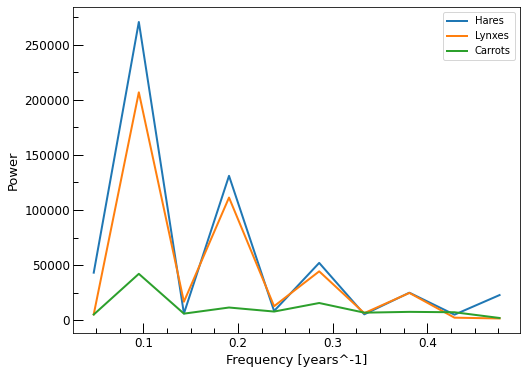

In [13]:
'''
    FFT analysis.
'''
time_step = 1

# FFT of the signals
sig_h = sp.fftpack.fft(hares)
sig_l = sp.fftpack.fft(lynxes)
sig_c = sp.fftpack.fft(carrots)

# power spectra
power_h = np.abs(sig_h)
power_l = np.abs(sig_l)
power_c = np.abs(sig_c)

# frequencies
freq_h = fftpack.fftfreq(hares.size, d=time_step) 
freq_l = fftpack.fftfreq(lynxes.size, d=time_step)
freq_c = fftpack.fftfreq(carrots.size, d=time_step)

'''
    Find peak frequencies, focusing on
    positive frequencies only. The period
    can then be found from the peak frequency f as
    period = 1 / f.
'''

# peak frequencies for hares
mask_h = np.where(freq_h > 0)
freq_h_fil = freq_h[mask_h]
power_h_fil = power_h[mask_h]
peak_freq_h = freq_h_fil[power_h[mask_h].argmax()]

# peak frequencies for lynxes
mask_l = np.where(freq_l > 0)
freq_l_fil = freq_l[mask_l]
power_l_fil = power_l[mask_l]
peak_freq_l = freq_l_fil[power_l[mask_l].argmax()]

# peak frequencies for carrots
mask_c = np.where(freq_c > 0)
freq_c_fil = freq_c[mask_c]
power_c_fil = power_c[mask_c]
peak_freq_c = freq_c_fil[power_c[mask_c].argmax()]

# results
name = ["Hares", "Lynxes", "Carrots"]
frequency = [freq_h_fil, freq_l_fil, freq_c_fil]
power = [power_h_fil, power_l_fil, power_c_fil]
peak = [peak_freq_h, peak_freq_l, peak_freq_c]

for n, f in zip(name, peak):
    period = 1 / f
    print("%s peak frequency is %.4f (years)^-1, hence the period is %.4f years." % (n, f, period))
    
'''
    Analysis plot.
'''

# plot layout
fig, ax = plt.subplots(figsize=(8,6))
set_ticks(ax, 0.1, 4, 50000, 2)

# plot
for i in range(len(name)):
    ax.plot(frequency[i], power[i], lw=2, label=name[i])

# labels
ax.set_xlabel("Frequency [years^-1]", fontsize=13)
ax.set_ylabel("Power", fontsize=13)
ax.legend(loc="best", markerscale=1)

plt.show()

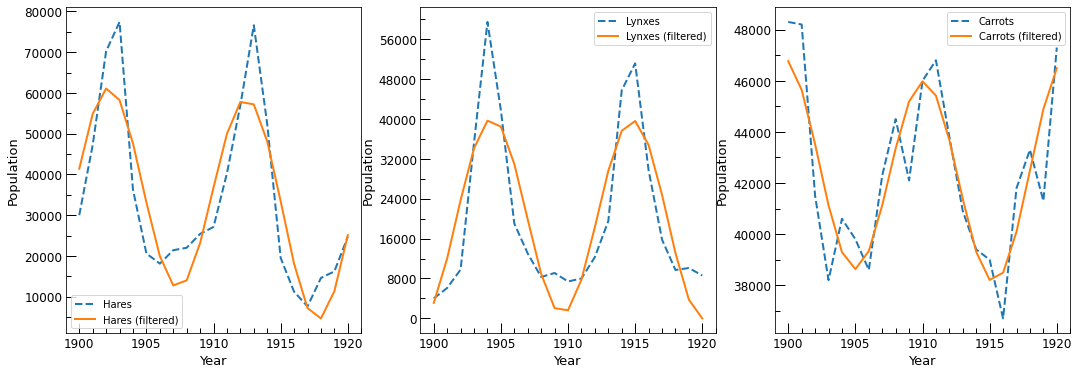

In [14]:
'''
    Signal reconstruction: remove frequencies higher 
    than the peak ones; finally inverse transform.
'''
# hares
high_freq_fft_h = sig_h.copy()
high_freq_fft_h[np.abs(freq_h) > peak_freq_h] = 0
filtered_sig_h = fftpack.ifft(high_freq_fft_h)
filtered_sig_h_real = np.real(filtered_sig_h)

# lynxes
high_freq_fft_l = sig_l.copy()
high_freq_fft_l[np.abs(freq_l) > peak_freq_l] = 0
filtered_sig_l = fftpack.ifft(high_freq_fft_l)
filtered_sig_l_real = np.real(filtered_sig_l)

# carrots
high_freq_fft_c = sig_c.copy()
high_freq_fft_c[np.abs(freq_c) > peak_freq_c] = 0
filtered_sig_c = fftpack.ifft(high_freq_fft_c)
filtered_sig_c_real = np.real(filtered_sig_c)

'''
    Final plot.
'''

feats = [hares, lynxes, carrots]
feats_fil = [filtered_sig_h_real, filtered_sig_l_real, filtered_sig_c_real]

# plot layout
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
set_ticks(ax[0], 5, 5, 10000, 2)
set_ticks(ax[1], 5, 5, 8000, 2)
set_ticks(ax[2], 5, 5, 2000, 2)

# plot
for i in range(len(name)):
    ax[i].plot(year, feats[i], lw=2, ls="--", label=name[i])
    ax[i].plot(year, feats_fil[i], lw=2, label=name[i]+" (filtered)")

# labels
for i in range(len(name)):
    ax[i].set_xlabel("Year", fontsize=13)
    ax[i].set_ylabel("Population", fontsize=13)
    ax[i].legend(loc="best", markerscale=1)

plt.show()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

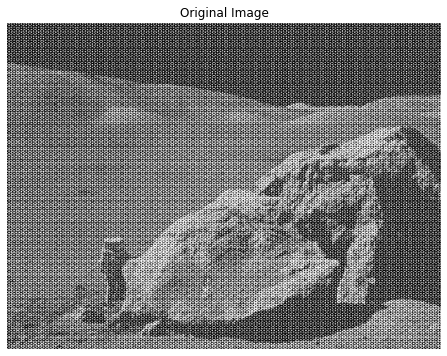

In [15]:
'''
    Plot the original image.
'''

# import image
im = plt.imread("data/moonlanding.png").astype(float)

# plot layout
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title("Original Image")
ax.axis('off')

# plot
ax.imshow(im, cmap="gray")

plt.show()

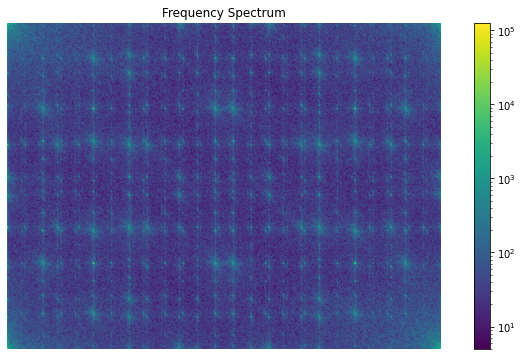

In [16]:
'''
    FFT of the original image.
'''

# 2D discrete Fourier transform of the image
im_fft = fftpack.fft2(im)

# plot layout
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title("Frequency Spectrum")
ax.axis('off')

# plot with a logarithmic colormap
spectrum = ax.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
fig.colorbar(spectrum)

plt.show()

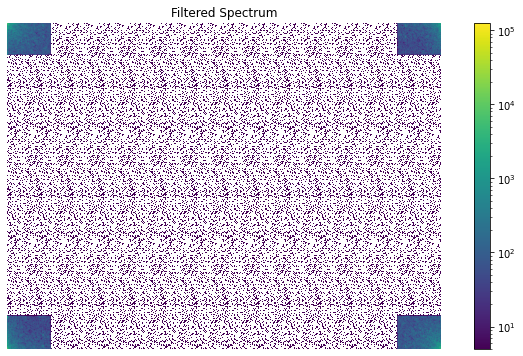

In [17]:
'''
    Locate plot regions that contain signal or noise.
    Interpret the FFT of the image in terms of rows
    and columns.
    Set to zero all rows with indices between r*threshold
    and r*(1-threshold). Repeat for the columns.
'''

# threshold of coefficients
threshold = 0.1

# analysis
im_fft2 = im_fft.copy()
rows, cols = im_fft2.shape

# region selections
im_fft2[int(rows*threshold):int(rows*(1-threshold))] = 0 # rows
im_fft2[:, int(cols*threshold):int(cols*(1-threshold))] = 0 # columns

# plot layout
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title("Filtered Spectrum")
ax.axis('off')

# plot with a logarithmic colormap
spectrum2 = ax.imshow(np.abs(im_fft2), norm=LogNorm(vmin=5))
plt.colorbar(spectrum2)

plt.show()

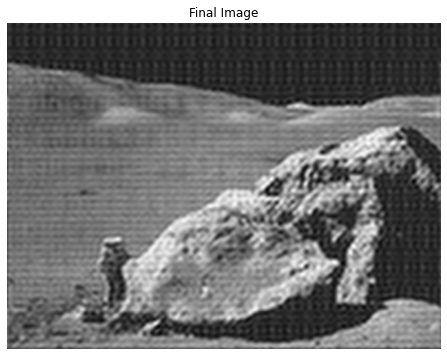

In [18]:
'''
    Image reconstruction.
    Keep only the real values.
'''

# select real part
im_final = fftpack.ifft2(im_fft2).real 

# plot layout
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title("Final Image")
ax.axis('off')

# plot
ax.imshow(im_final, cmap="gray")

plt.show()